In [206]:
"""
Objective : what sorts of people were more likely to survive?” 
using passenger data (ie name, age, gender, socio-economic class, etc).

Metadata:
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

Target/Dependent Column - Survived column

Survived has total different values : 2
Survived
0    549
1    340

My target is imbalanced .


"""

'\nObjective : what sorts of people were more likely to survive?” \nusing passenger data (ie name, age, gender, socio-economic class, etc).\n\nMetadata:\nRangeIndex: 891 entries, 0 to 890\nData columns (total 12 columns):\n #   Column       Non-Null Count  Dtype  \n---  ------       --------------  -----  \n 0   PassengerId  891 non-null    int64  \n 1   Survived     891 non-null    int64  \n 2   Pclass       891 non-null    int64  \n 3   Name         891 non-null    object \n 4   Sex          891 non-null    object \n 5   Age          714 non-null    float64\n 6   SibSp        891 non-null    int64  \n 7   Parch        891 non-null    int64  \n 8   Ticket       891 non-null    object \n 9   Fare         891 non-null    float64\n 10  Cabin        204 non-null    object \n 11  Embarked     889 non-null    object \ndtypes: float64(2), int64(5), object(5)\n\nTarget/Dependent Column - Survived column\n\nSurvived has total different values : 2\nSurvived\n0    549\n1    340\n\nMy target is i

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [208]:
df=pd.read_csv("titanic.csv")
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [209]:
df.info() # to know the metadata of the given data
# 5 object columns present
# missing values also present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
# Preprocessing

In [211]:
# 1. Null removal

In [212]:
# checking for % of missing value
(df.isnull().sum()/len(df))*100
# Age - 19.865320 - check for normal distribution , if not replace with median otherwise with mean
# Cabin - 77.104377 - drop the cabin column
# Embarked - 0.224467 - drop the row
# rule for handling missing data --
'''
0-3% - drop row
3-40% - replace null with mean if column is normally distributed
otherwise replace with median
>40% - drop the column
'''

'\n0-3% - drop row\n3-40% - replace null with mean if column is normally distributed\notherwise replace with median\n>40% - drop the column\n'

In [213]:
df.drop("Cabin",axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

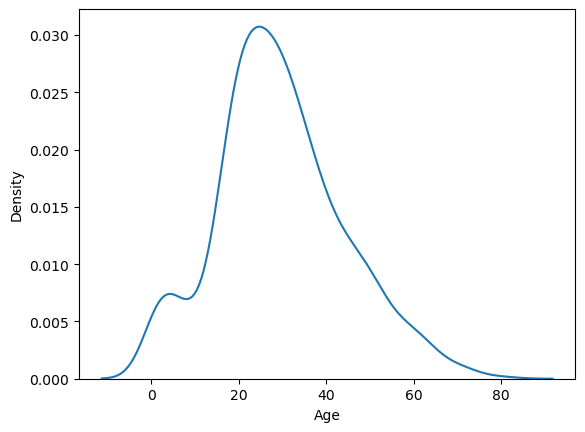

In [214]:
sns.kdeplot(df["Age"]) # skewness is present so replace with median

In [215]:
# Age column null value replaced wih median
m=df["Age"].median()
df["Age"].fillna(m,inplace=True)
df["Age"].isnull().sum()

np.int64(0)

In [216]:
df.dropna(inplace=True)

In [217]:
(df.isnull().sum()/len(df))*100
# all the null values have been removed

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [218]:
# checking for statistical distribution
numerical_cols=df.select_dtypes(["int","float"]).columns
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [219]:
df[numerical_cols].describe()
# PassengerId - from domain knowledge dropping this.
# Survived - since it is a categorical we will consider its value distribution and not mean median
# Pclass - since it is a categorical we will consider its value distribution and not mean median
# Age - mean>median  - so slightly +vely skewed
# SibSp	Parch - since it is a categorical we will consider its value distribution and not mean median
# Fare - mean>median - so +vely skewed.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [220]:
# statistical distribution of Age ,Fare

<Axes: ylabel='Age'>

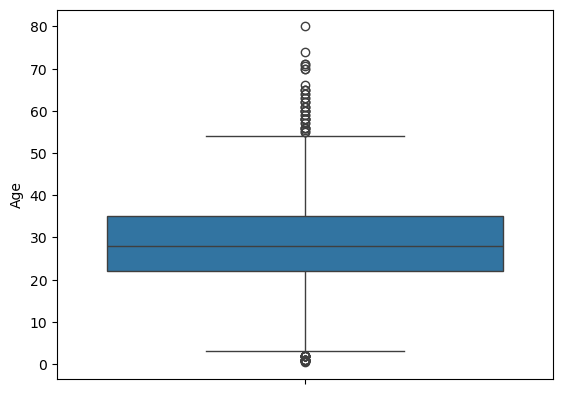

In [221]:
sns.boxplot(df["Age"]) # Many people aged above 80 were travelling. 
# Some newborn babies were also travelling.

<Axes: ylabel='Fare'>

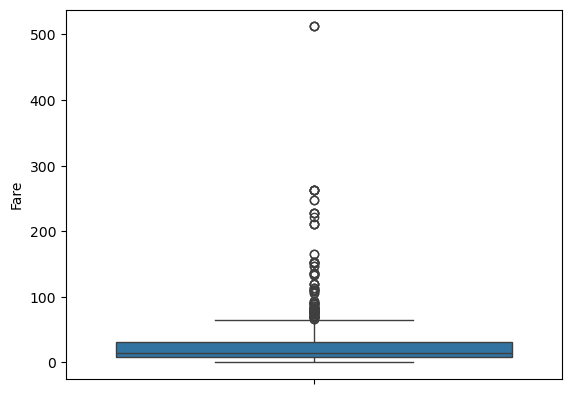

In [222]:
sns.boxplot(df["Fare"])

<Axes: xlabel='Age', ylabel='Density'>

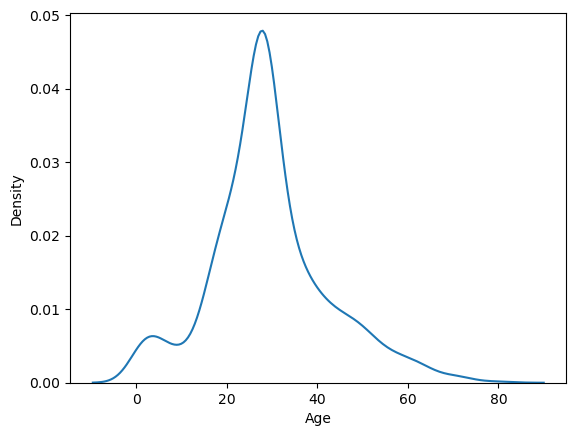

In [223]:
sns.kdeplot(df["Age"]) # many people aged 29-30 were travelling,
# People aged 80 were also trvaelling.

<Axes: xlabel='Fare', ylabel='Density'>

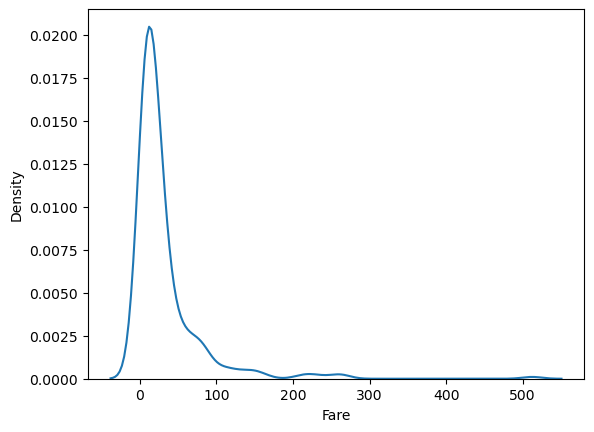

In [224]:
sns.kdeplot(df["Fare"])  #amount of 512 is paid by few people 
# many were travelling with money 0.

In [225]:
# for now not removing outliers and skew as they may be impacting the target i.e.
# survival rate

In [226]:
from scipy.stats import skew

In [227]:
for i in ["Age","Fare"]:
    print(f"{i} : {skew(df[i])} ")
# Fare is very highly skewed. Age is also skewed.

Age : 0.507152516392603 
Fare : 4.793334993307843 


In [228]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [229]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [230]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [231]:
# Object encoding
object_cols=df.select_dtypes("object").columns
object_cols

Index(['Sex', 'Embarked'], dtype='object')

In [232]:
for i in object_cols:
    print(f"{i} has total different values : {df[i].nunique()}\n{df[i].value_counts()}")

Sex has total different values : 2
Sex
male      577
female    312
Name: count, dtype: int64
Embarked has total different values : 3
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [233]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[object_cols]=enc.fit_transform(df[object_cols])

In [234]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.25,2.0


In [235]:
#Categorical data distribution check, where Survived is Target and rest are the features.
c=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
for i in c:
    print(f"{i} has total different values : {df[i].nunique()}\n{df[i].value_counts()}")


Survived has total different values : 2
Survived
0    549
1    340
Name: count, dtype: int64
Pclass has total different values : 3
Pclass
3    491
1    214
2    184
Name: count, dtype: int64
Sex has total different values : 2
Sex
1.0    577
0.0    312
Name: count, dtype: int64
SibSp has total different values : 7
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch has total different values : 7
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked has total different values : 3
Embarked
2.0    644
0.0    168
1.0     77
Name: count, dtype: int64


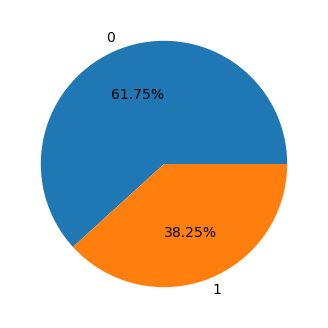

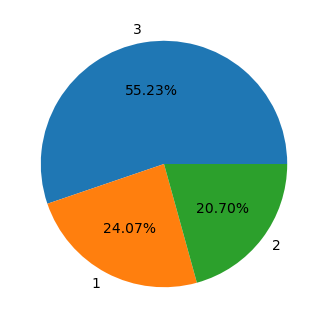

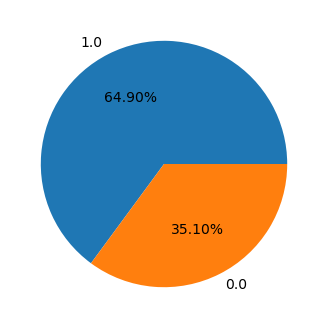

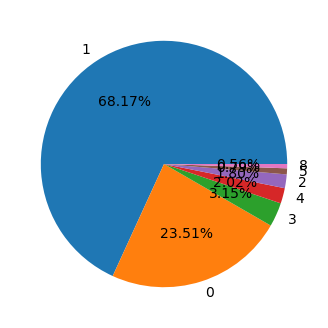

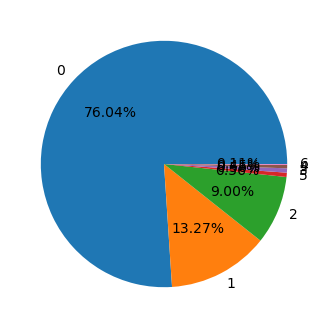

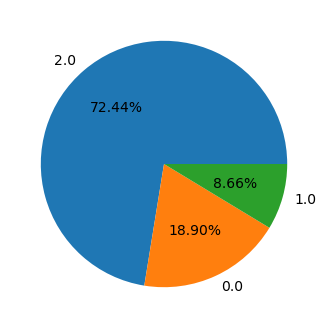

In [236]:
c=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
for i in c:
    plt.figure(figsize=(4,4))
    plt.pie(df[i].value_counts(),autopct="%.2f%%",labels=df[i].unique())
    plt.show()
# Around 62% people died and 38% people survived.
# Around 55% people were travelling from class3. 24% people from class1.
# Around 35% Females and rest Male
# Around 68% people were travelling with sibling or spouse.
# Around 76% people were travelling without child.
# Around 72% people were embarked from station 2 or S.

In [237]:
# Feature engineerning
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [238]:
df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1.0,22.0,7.25,2.0,1


In [239]:
# There is no feature selection capability in Logistic Regression

Feature :  Pclass


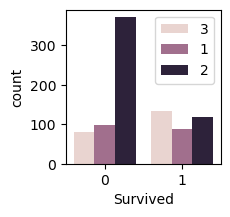

Feature :  Sex


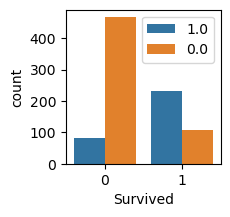

Feature :  FamilySize


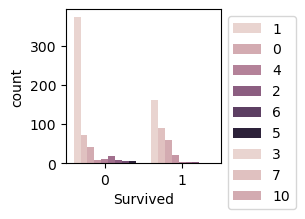

Feature :  Embarked


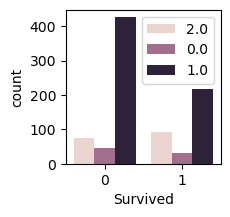

In [240]:
# How target is getting effected by other categorical features.
c=["Pclass","Sex","FamilySize","Embarked"]
for i in c:
    print("Feature : ",i)
    plt.figure(figsize=(2,2))
    sns.countplot(data=df,x="Survived",hue=i)
    plt.legend(df[i].unique(),bbox_to_anchor=(1,1),loc="best")
    plt.show()
# Class 2 people died the most and class3 people survived comparatively more.
# Males died mostly.
# Family size of 1 died the most.
# People from station 1 have died the most

Feature :  Age


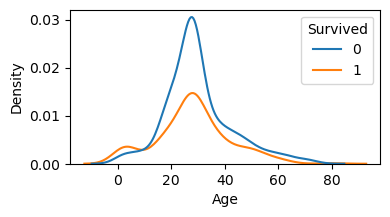

Feature :  Fare


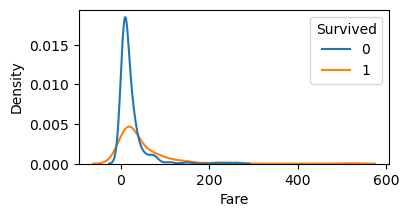

In [241]:
# How target is getting effected by other numerical features.
c=["Age","Fare"]
for i in c:
    print("Feature : ",i)
    plt.figure(figsize=(4,2))
    sns.kdeplot(data=df,x=i,hue="Survived")
    plt.show()
# Age is overlapped , so not helping
# High fare giving people survived

In [242]:
features=df.drop("Survived",axis=1)
target=df["Survived"]

In [243]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0.825209,0.735342,-0.563674,-0.500240,0.586840,0.057853
1,-1.572211,-1.359911,0.669217,0.788947,-1.939555,0.057853
2,0.825209,-1.359911,-0.255451,-0.486650,0.586840,-0.561804
3,-1.572211,-1.359911,0.438050,0.422861,0.586840,0.057853
4,0.825209,0.735342,0.438050,-0.484133,0.586840,-0.561804


In [244]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.15, random_state=4)

In [245]:
print(xtrain.shape,ytrain.shape)

(755, 6) (755,)


In [246]:
print(xtest.shape,ytest.shape)

(134, 6) (134,)


In [247]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain) #
ypred=lr.predict(xtest)

In [248]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [249]:
c=pd.DataFrame(confusion_matrix(ytest,ypred),
              index=["Not Survived","Survived"],
              columns=["Not Survived","Survived"])
print(f"Confusion Matrix : \n{c}")
print("Classification Report : \n",classification_report(ytest,ypred))

Confusion Matrix : 
              Not Survived  Survived
Not Survived            66        11
Survived                18        39
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.78      0.68      0.73        57

    accuracy                           0.78       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



In [250]:
# checking for overfitting

In [251]:
print(f"Training score : {lr.score(xtrain,ytrain)}")
print(f"Testing score : {lr.score(xtest,ytest)}")
# A little overfitting
#training_score>testing_score -- overfitting
#training_score<testingscore -- underfitting

Training score : 0.8026490066225166
Testing score : 0.7835820895522388


In [252]:
# checking individual class belonging probability of top 10 predictions
lr.predict_proba(xtest[:10].values)

array([[0.39922361, 0.60077639],
       [0.02950519, 0.97049481],
       [0.62950321, 0.37049679],
       [0.15580515, 0.84419485],
       [0.16857823, 0.83142177],
       [0.50000641, 0.49999359],
       [0.88611132, 0.11388868],
       [0.38143577, 0.61856423],
       [0.91509026, 0.08490974],
       [0.98605995, 0.01394005]])

In [253]:
# checking for roc-auc score
from sklearn.metrics import roc_auc_score,roc_curve
print(f"ROC_AUC Score : {roc_auc_score(ytest,ypred)}")
# i.e. at 0.5 threshold the 77% of times, model is able to distinguish between classes.

ROC_AUC Score : 0.7706766917293233


In [254]:
# ROC Curve (TPR) against False Positive Rate(FPR)
# AUC score of 1.0 
# 0.5<AUC_SCORE<1.0

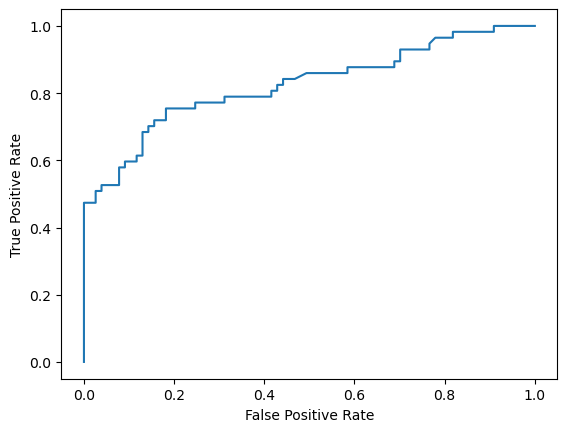

In [255]:
yp=lr.predict_proba(xtest)[:,1]
fpr,tpr,threshold=roc_curve(ytest,yp)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [256]:
threshold

array([       inf, 0.97372422, 0.7728948 , 0.75944569, 0.73785051,
       0.7259911 , 0.69336729, 0.67132272, 0.64500498, 0.64495791,
       0.64127695, 0.62581548, 0.61664495, 0.6165023 , 0.60886709,
       0.56023522, 0.51875957, 0.49999359, 0.49966915, 0.49642486,
       0.45187234, 0.38398366, 0.36842578, 0.35728762, 0.29916881,
       0.25355698, 0.24921193, 0.23580702, 0.22338617, 0.21128291,
       0.21052226, 0.19834844, 0.18313477, 0.1489207 , 0.13537775,
       0.13194435, 0.13174631, 0.11402189, 0.1139935 , 0.10692195,
       0.10602261, 0.1033575 , 0.09506662, 0.09358887, 0.08743846,
       0.0847863 , 0.08475525, 0.07926244, 0.07587864, 0.07410199,
       0.07163169, 0.0672421 , 0.05066254, 0.04745246, 0.01394005])

In [257]:
# finding the best threshold by f1_score
from sklearn.metrics import f1_score
f1=[f1_score(ytest,(yp>=t).astype(int)) for t in threshold]
best_t = threshold[np.argmax(f1)]
print(f"Best Threshold : {round(best_t,2)}")
'''
'''

Best Threshold : 0.38


'\n'

In [258]:
# So we will use a threshold of 0.38 instead of 0.5

In [259]:
from sklearn.preprocessing import binarize
ypred_proba=lr.predict_proba(xtest)[:,1]
ypr=binarize([ypred_proba],threshold=0.38)[0]

In [260]:
ypr=ypr.astype(int)

In [261]:
roc_auc_score(ytest,ypr)

np.float64(0.779790385053543)

In [263]:
c=pd.DataFrame(confusion_matrix(ytest,ypr),
              index=["Not Survived","Survived"],
              columns=["Not Survived","Survived"])
print(f"Confusion Matrix : \n{c}")
print("Classification Report : \n",classification_report(ytest,ypr))

Confusion Matrix : 
              Not Survived  Survived
Not Survived            62        15
Survived                14        43
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        77
           1       0.74      0.75      0.75        57

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134

